In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objs as go

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Load the data
titanic = sns.load_dataset('titanic')
#Print the first 10 rows of data
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [6]:
#Count the number of rows and columns in the data set 
titanic.shape

(891, 15)

In [7]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


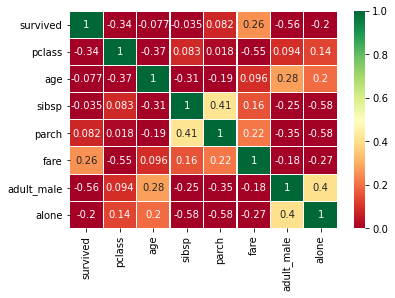

In [8]:
#Correllation matrix
sns.heatmap(titanic.corr(), 
            xticklabels=titanic.corr().columns.values,
            yticklabels=titanic.corr().columns.values,
            annot=True,
            cbar=True,
            cmap="RdYlGn",
            linewidths=.1, 
            annot_kws={"size": 10},
            vmin=0, 
            vmax=1)

In [10]:
#Encoding categorical data values (Transforming object data types to integers)
labelencoder = LabelEncoder()

#Encode sex column
titanic.iloc[:,2]= labelencoder.fit_transform(titanic.iloc[:,2].values)
#print(labelencoder.fit_transform(titanic.iloc[:,2].values))

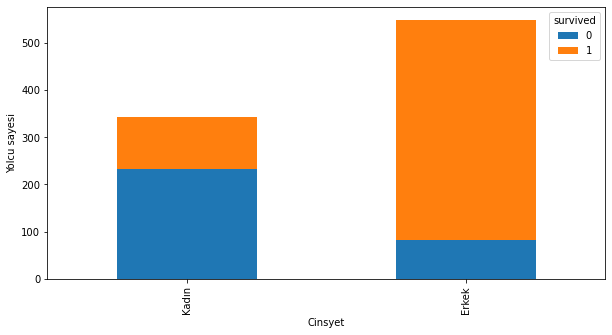

In [11]:
hayatta = titanic[titanic["survived"]==1]["sex"].value_counts()
olen = titanic[titanic["survived"]==0]["sex"].value_counts()
df = pd.DataFrame([hayatta,olen])
df.index = ["Kadın","Erkek"]
df.plot(kind="bar",stacked=True,figsize=(10,5))
plt.xlabel('Cinsyet')
plt.ylabel('Yolcu sayesi')
plt.legend(title="survived")

Text(0.5, 1.0, ' ')

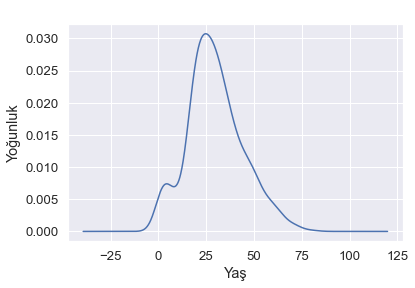

In [13]:
sns.set(font_scale=1.2)
titanic['age'].plot.kde()
plt.xlabel('Yaş')
plt.ylabel('Yoğunluk')
plt.title(' ')

In [14]:
#Count the empty (NaN, NAN, na) values in each column 
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
# Drop the columns
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'alone', 'adult_male', 'who'], axis=1)

#Remove the rows with missing values
titanic = titanic.dropna(subset =['embarked', 'age'])

In [16]:
#Count the NEW number of rows and columns in the data set
titanic.shape

(712, 8)

In [17]:
titanic.dtypes

survived      int64
pclass        int64
sex           int32
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [18]:
#Encode embarked
titanic.iloc[:,7]= labelencoder.fit_transform(titanic.iloc[:,7].values)
#print(labelencoder.fit_transform(titanic.iloc[:,7].values))

#Print the NEW unique values in the columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [20]:
#Split the data into independent 'X' and dependent 'Y' variables
X = titanic.iloc[:, 1:8].values 
Y = titanic.iloc[:, 0].values 

In [21]:
# Split the dataset into 80% Training set and 20% Testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [22]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
X_train

array([[-1.49280291,  0.7475989 ,  0.11755613, ..., -0.50386115,
         0.26128855,  0.53057164],
       [-1.49280291,  0.7475989 ,  0.60758867, ...,  0.62486718,
         2.10276281,  0.53057164],
       [-0.30316025,  0.7475989 ,  0.39757473, ..., -0.50386115,
        -0.17679857,  0.53057164],
       ...,
       [-0.30316025,  0.7475989 , -0.93251358, ..., -0.50386115,
        -0.17679857,  0.53057164],
       [-0.30316025,  0.7475989 ,  0.67759332, ..., -0.50386115,
        -0.17679857,  0.53057164],
       [ 0.8864824 , -1.33761567, -0.3724764 , ...,  2.88232383,
        -0.2973683 , -1.99574857]])

In [24]:
#Using Logistic Regression Algorithm to the Training Set
def models(X,Y):
    #Using Logistic Regression Algorithm to the Training Set
    log = LogisticRegression(random_state = 0)
    log.fit(X,Y)
  
    #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X,Y)

    #Using SVC method of svm class to use Support Vector Machine Algorithm
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X,Y)

    #Using SVC method of svm class to use Kernel SVM Algorithm
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X,Y)

    #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
    gauss = GaussianNB()
    gauss.fit(X,Y)

    #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X,Y)

    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X,Y)
  
    #print model accuracy on the training data.
    results = pd.DataFrame({
        'Model': ['Logistic Regression:',
                  'K Nearest Neighbor',
                  'SVM - Linear Classifier',
                  'SVM - RBF Classifier',
                  'Gaussian Naive Bayes',
                  'Decision Tree',
                  'Random Forest'],
        'Score': [log.score(X,Y),
                  knn.score(X,Y), 
                  svc_lin.score(X,Y),              
                  svc_rbf.score(X,Y),
                  gauss.score(X,Y),
                  tree.score(X,Y),
                  forest.score(X,Y)]})
    print(results)
    
    # Short the accuracy by the higher score
    print('------------------------------------')
    print('---------The shorted list-----------')
    print('------------------------------------')
    result_df = results.sort_values(by='Score', ascending=False)
    print(result_df)
    
    sns.set(font_scale=1.5)
    bestmodelgraph = result_df.head(7)
    ax = sns.catplot("Model", y="Score", data=bestmodelgraph,
                palette='Blues_d',aspect=3.5,kind='bar')
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

                     Model     Score
0     Logistic Regression:  0.797891
1       K Nearest Neighbor  0.866432
2  SVM - Linear Classifier  0.776801
3     SVM - RBF Classifier  0.850615
4     Gaussian Naive Bayes  0.803163
5            Decision Tree  0.992970
6            Random Forest  0.975395
------------------------------------
---------The shorted list-----------
------------------------------------
                     Model     Score
5            Decision Tree  0.992970
6            Random Forest  0.975395
1       K Nearest Neighbor  0.866432
3     SVM - RBF Classifier  0.850615
4     Gaussian Naive Bayes  0.803163
0     Logistic Regression:  0.797891
2  SVM - Linear Classifier  0.776801


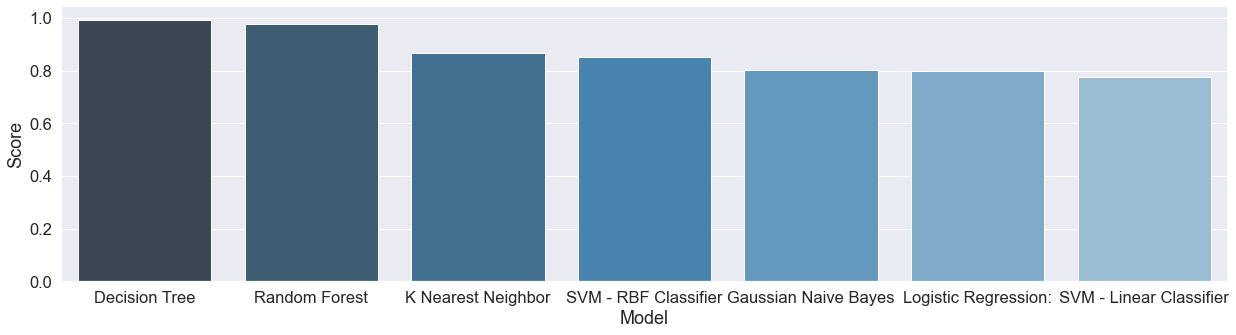

In [25]:
#Get and train all of the models
model = models(X_train,Y_train)

In [26]:
for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test)) 
    #extracting TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    print(cm)
    print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
    print()# Print a new line

[[73  9]
 [18 43]]
Model[0] Testing Accuracy = "0.8111888111888111 !"

[[71 11]
 [20 41]]
Model[1] Testing Accuracy = "0.7832167832167832 !"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902 !"

[[75  7]
 [22 39]]
Model[3] Testing Accuracy = "0.7972027972027972 !"

[[69 13]
 [23 38]]
Model[4] Testing Accuracy = "0.7482517482517482 !"

[[60 22]
 [10 51]]
Model[5] Testing Accuracy = "0.7762237762237763 !"

[[67 15]
 [13 48]]
Model[6] Testing Accuracy = "0.8041958041958042 !"



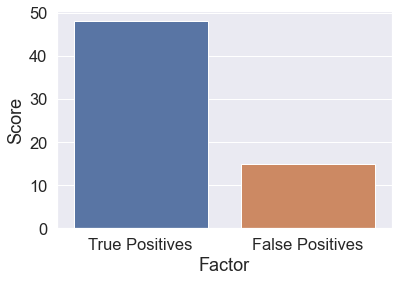

In [27]:
positives = pd.DataFrame({
    'Factor': ['True Positives', 'False Positives', ],
    'Score': [TP, FP]})
sns.barplot(x='Factor',y='Score',data=positives)

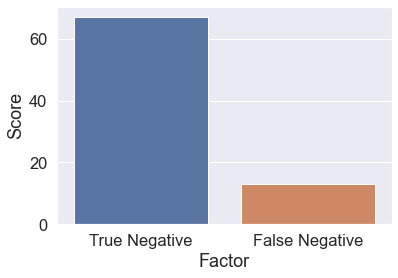

In [28]:
negatives = pd.DataFrame({
    'Factor':['True Negative', 'False Negative'],
    'Score':[TN, FN]
})
sns.barplot(x='Factor',y='Score',data=negatives)

In [29]:
my_survival = [[3,1,29,0, 0, 0, 1]]
#Print Prediction of Random Forest Classifier model
pred = model[6].predict(my_survival)
print(pred)

if pred == 0:
  print("Üzgünüm, başaramadın")
else:
  print("Yaşasın, başardınız")

[0]
Üzgünüm, başaramadın
